In [1]:
# install nltk, gensim and keep all texts in the text folder (or link)
# creating line-sentences for gensim.word2vec mode with nltk
import os  
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

# 2 main functions to get the sentences ready for the model into lists(sentence) of lists(words)

def line_sentences(file_path):
    """
    return a list of lineSentences. breaks utf-8 ;(
    """
    #sfs = nltk.tokenize.stanford_segmenter.StanfordSegmenter("stanford-parser.jar")   
    raw = unicode(open(file_path).read(), errors='replace')
    #sent_tokenize_list = sfs.segment_sents(raw)
    sent_tokenize_list = sent_tokenize(raw)
    return sent_tokenize_list

def sentences_word_tokenized(lines):
    """
    breaks the line sentences into word lists
    """
    lines_tokenized = []
    for line in lines:
        lines_tokenized.append(word_tokenize(line))
        #lines_tokenized.append(map(lambda w : w.encode('ascii','ignore'),word_tokenize(line)))
    return lines_tokenized
        
def save_line_sentence_file(file_path, sentences):
    sentences = LineSentence(file_path)
    

In [2]:
# prepare the text

file_path = 'text/lucien_sfez.txt' # 'text/v4_combined.txt'
lines = line_sentences(file_path)#'text/v4_combined.txt')
sentences = sentences_word_tokenized(lines)

def print_lines():
    for line in lines:
        print line, word_tokenize(line)
        
def print_sentences():
    for sentence in sentences:
        print sentence

In [3]:
# build the model
import gensim
import math

#model.build_vocab(sentences)
model = gensim.models.Word2Vec(sentences, size=1000, window=5, min_count=3, workers=8)
#model.save()
model.init_sims(replace=True)
print model
print 'model memory size, mb:', model.estimate_memory()['total']/(math.pow(1024,2))

Word2Vec(vocab=85, size=1000, alpha=0.025)
model memory size, mb: 0.689029693604


In [4]:
# should go into my_module

def print_similarities(similarity_list):
    for similarity in similarity_list:
        print similarity[0].ljust(18),similarity[1]
        

def word_similar_cosmul_p(word,topn=10, do_print = True,words_only = False):
    if do_print: print "word:",word
    similarities = model.similar_by_word(word,topn)
    if do_print: print_similarities(similarities)    
    if words_only:
        similarities = map(lambda sim : sim[0],similarities)
    return similarities  

In [5]:
# print all words in the vocabulary and their 10 most similar words
for w in model.vocab:
    word_similar_cosmul_p(w)
    


word: control
the                0.34049808979
to                 0.337391734123
,                  0.332774996758
of                 0.286473095417
and                0.284089297056
be                 0.280399888754
with               0.274270892143
in                 0.267456412315
from               0.250575184822
is                 0.248816519976
word: and
to                 0.481027781963
the                0.475595921278
,                  0.44372177124
of                 0.423580527306
from               0.379990100861
with               0.378594428301
be                 0.360528856516
a                  0.357245773077
.                  0.35586091876
has                0.349672198296
word: all
the                0.330345898867
and                0.322357356548
,                  0.306019961834
to                 0.297556340694
from               0.272700697184
of                 0.264623463154
.                  0.252791345119
be                 0.24866579473
are               

/Users/raminsoleymani/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


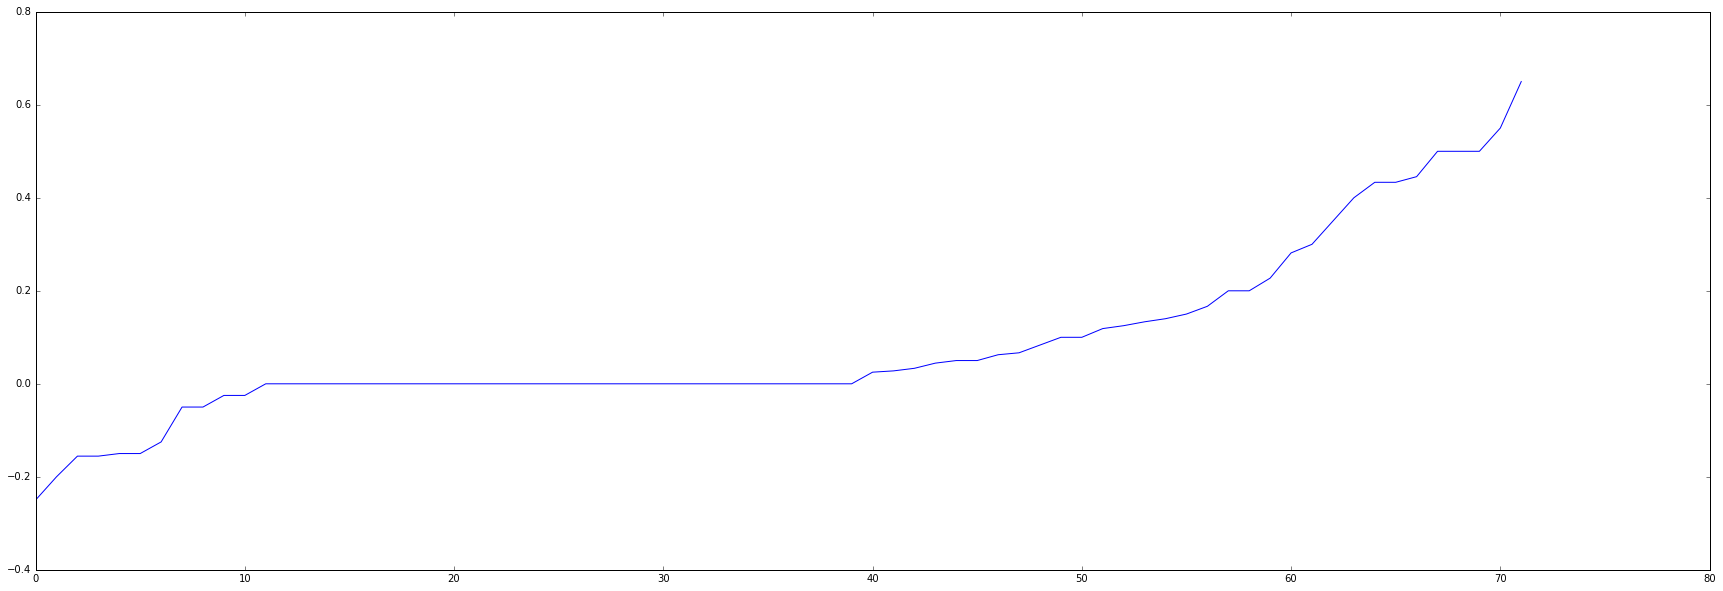

[-0.25, 53]
If they do not need to defend themselves, people���s existence begins to seem pointless.
[-0.2, 56]
The idea of the human brain as the poor relation of the all-powerful computer has lead to a sense of powerlessness and futility.
[-0.15555555555555559, 28]
Think how people panic when their computer or television breaks down or their phone is out of order.
[-0.15555555555555559, 31]
When they break down it is like being in pain, the fear of it is a nightmare.
[-0.15, 55]
Machines do human work to perfection, while people are clumsy and hesitant and make mistakes, trying falteringly to follow a pattern.
[-0.15, 58]
Contrary to common belief, homo communicans of the future will not suffer from pressure and stress.
[-0.125, 3]
Information highways, despite the hype, are no more than a combination of telephone, video and computers, as are the gadgets telecom engineers devise for the future.
[-0.05, 25]
It seemed a strange answer.
[-0.05, 47]
We open doors and change channels on t

In [6]:
# Sentiment analysis of the whole text file

from textblob import TextBlob
import numpy as np
import json

raw = unicode(open(file_path).read(), errors='replace')

blob = TextBlob(raw)

sentiments = []
c = 0
for sentence in blob.sentences:
    sentiments.append([sentence.sentiment.polarity,c])
    #print c,sentence
    c += 1


sen_sorted = sorted(sentiments, key= lambda s : s[0])
sen_reduced =map(lambda s : s[0],sen_sorted)


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[30, 10])
plt.plot(sen_reduced)
plt.show()

dump_file = open('v4_combined_after_retune_sentiment_ranking.json','w')
for sen in sen_sorted:
    dump_file.write(json.dumps({'sen':sen,'text':blob.sentences[int(sen[1])].string}))
    print sen
    print blob.sentences[int(sen[1])]
dump_file.close()

In [19]:
from nltk import Text
import lib
cool_words = []

for word in model.vocab:  
    w_tag = lib.tag(word)
    #print word, w_tag[1]
    raw = unicode(open(file_path).read(), errors='replace')
    text = Text(word_tokenize(raw))
    if w_tag[1] in ['NN','VB',"VBG",'RB','NNS','ADJ','ADV','ADP']:
        cool_words.append(word)
        #text.concordance(word)
        #nltk.help.upenn_tagset(w_tag[1])
    
print len(cool_words), 'nice words'

37 nice words


In [20]:
def scaled_dispersion_plot(text,words,ignore_case=False, title = 'LExical Dispersion Plot'):
    from matplotlib import pylab
    text = list(text)
    words.reverse()
    
    words_to_comp = words
    text_to_comp = text
    
    ignore_case = False
    points= [(x,y) for x in range(len(text_to_comp))
            for y in range(len(words_to_comp))
            if text_to_comp[x] == words_to_comp[y]]
    
    if points:
        x,y = list(zip(*points))
    else:
        x = y = ()
    
    pylab.plot(x,y,'b|',scalex = 0.1)
    pylab.yticks(list(range(len(words))), words, color='b')
    pylab.ylim(-1,len(words))
    pylab.title(title)
    pylab.xlabel('word offset')
    pylab.show()

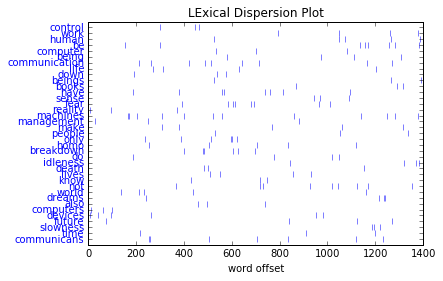

In [21]:
scaled_dispersion_plot(text, cool_words)